### **Canny算法**

* Canny算法不容易受噪声的影响，能识别图像中的弱边缘和强边缘，并结合边缘的位置信息综合给出图像的整体边缘信息，是目前最优秀的边缘检测算法之一

* 该方法的检测过程分以下5个步骤:
1. 使用高斯滤波平滑图像，减小噪声，一般使用5 × 5的高斯滤波器
$$G=\frac{1}{139} \begin{bmatrix} 2 & 4 & 5 & 4 & 2 \\ 4 & 9 & 12 & 9 & 4 \\ 5 & 12 & 15 & 12 & 5 \\ 4 & 9 & 12 & 9 & 4 \\ 2 & 4 & 5 & 4 & 2\end{bmatrix}$$
2. 计算图像每个像素的梯度和幅值，首先通过Sobel算子分别检测图像x方向和y方向的边缘
3. 应用非极大值抑制算法消除边缘检测带来的杂散响应，首先将当前像素灰度值的梯度与正负梯度方向上的两个像素灰度值的梯度相比较，如果比另两个大则保留，否则抑制
4. 应用双阈值法划分强边缘和弱边缘，将边缘处的梯度值与两个阈值进行比较，弱梯度幅值小于较小阈值，则去除；若大于较小阈值但小于较大阈值，则标记为弱边缘；若梯度幅值大于较大阈值，则标记为强边缘
5. 消除孤立的弱边缘，在弱边缘的8邻域内寻找强边缘，若存在则保留该弱边缘，否则删除

In [6]:
# -*- coding:utf-8 -*-
import cv2 as cv
import numpy as np
import sys
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
# 设置中文字体
matplotlib.rcParams['font.family'] = 'simhei'
matplotlib.rcParams['axes.unicode_minus'] = False
rootpath = '/home/zomnk/python_ws/02-OpenCV4/images/'

In [7]:
# 读取图像并判断是否读取成功
img = cv.imread(rootpath +'equalLena.png', cv.IMREAD_ANYCOLOR)
if img is None:
    print('Failed to read equalLena.png')
    sys.exit

In [8]:
# 为了更好地展现边缘提取，此处定义函数使图像反向
def image_invert(img):
    h, w = img.shape[:2]  # 图片的高度和宽度
    imgInv = np.empty((w, h), np.uint8)  # 创建空白数组
    for i in range(h):
        for j in range(w):
            imgInv[i][j] = 255 - img[i][j]
    return imgInv

In [9]:
# 通过高阈值检测图像边缘
result_high = cv.Canny(img, 100, 200, apertureSize=3)
result_high = image_invert(result_high)
# 通过低阈值检测图像边缘
result_low = cv.Canny(img, 20, 40, apertureSize=3)
result_low = image_invert(result_low)
# 高斯模糊后检测图像边缘
result_gauss = cv.GaussianBlur(img, (3, 3), 5)
result_gauss = cv.Canny(result_gauss, 100, 200, apertureSize=3)
result_gauss = image_invert(result_gauss)

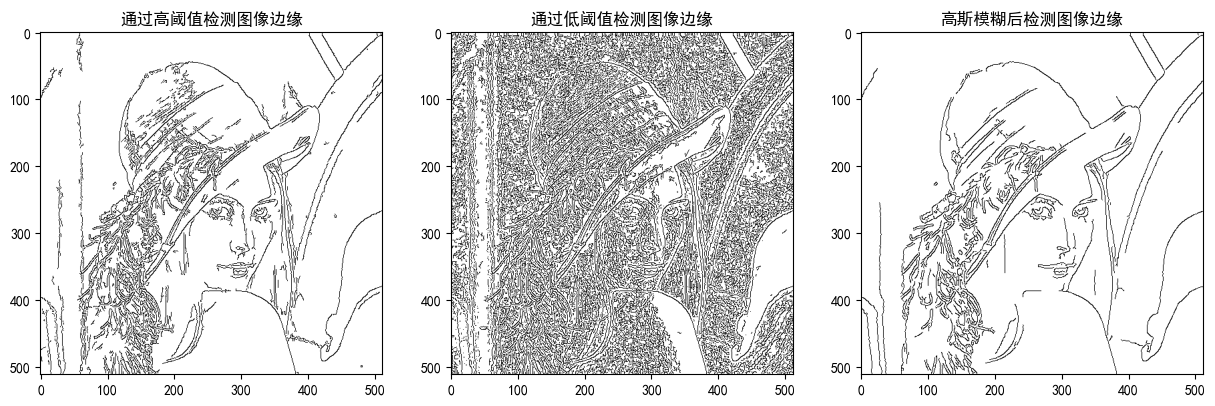

In [10]:
# 展示结果
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title('通过高阈值检测图像边缘')
plt.imshow(result_high, cmap='gray')
plt.subplot(1, 3, 2)
plt.title('通过低阈值检测图像边缘')
plt.imshow(result_low, cmap='gray')
plt.subplot(1, 3, 3)
plt.title('高斯模糊后检测图像边缘')
plt.imshow(result_gauss, cmap='gray')